# Analyzing Election Data

Code for testing examples from the paper [Stable Voting](https://arxiv.org/abs/2108.00542) by W. Holliday and E. Pacuit.   Consult [https://github.com/voting-tools/election-analysis](https://github.com/voting-tools/election-analysis) for further discussion of these examples and analyses of other elections. 

In [32]:
# import the Profile class
from pref_voting.profiles_with_ties import ProfileWithTies


# import the voting methods
from pref_voting.voting_methods import *

from preflibtools.instances import OrdinalInstance # use the preflibtools 

## Example 3.2: 2007 Glasgow City Council election for Ward 5

In [42]:

short_candname = {
    "Shaukat Butt": "B",
    "Michael Cobley": "C",
    "Stephen Dornan": "D",
    "John Flanagan": "F",
    "Alan L Hughes": "H1",
    "Allison Hunter": "H2",
    "Will Jess": "J",
    "Irene Lang": "L", 
    "Patricia Mcintyre": "M1",
    "George Douglas Mcnee": "M2",
    "Carolina Perez": "P",
}

# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./preflib-data/00008-00000009.toc")

rankings = list()
rcounts = list()
for o in instance.orders:
    order = o
    rank = dict()
    
    for r,cs in enumerate(o): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
    

prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()
prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()



There are 11 candidates and 9560 rankings: 
        The number of empty rankings: 0
        The number of rankings with ties: 9149
        The number of linear orders: 411
        The number of truncated linear orders: 0
        The number of rankings with skipped ranks: 0
        
        
H2(B C D F H1 J L M1 M2 P) 982
F(B C D H1 H2 J L M1 M2 P) 466
B(C D F H1 H2 J L M1 M2 P) 369
DFB(C H1 H2 J L M1 M2 P) 338
BDF(C H1 H2 J L M1 M2 P) 335
D(B C F H1 H2 J L M1 M2 P) 333
FDB(C H1 H2 J L M1 M2 P) 308
DF(B C H1 H2 J L M1 M2 P) 172
FD(B C H1 H2 J L M1 M2 P) 144
M1(B C D F H1 H2 J L M2 P) 137
M2(B C D F H1 H2 J L M1 P) 124
H2J(B C D F H1 L M1 M2 P) 112
FBD(C H1 H2 J L M1 M2 P) 102
DBF(C H1 H2 J L M1 M2 P) 95
H2L(B C D F H1 J M1 M2 P) 94
L(B C D F H1 H2 J M1 M2 P) 92
J(B C D F H1 H2 L M1 M2 P) 66
BD(C F H1 H2 J L M1 M2 P) 64
H2D(B C F H1 J L M1 M2 P) 60
C(B D F H1 H2 J L M1 M2 P) 60
H2F(B C D H1 J L M1 M2 P) 49
BFD(C H1 H2 J L M1 M2 P) 45
M1H1(B C D F H2 J L M2 P) 41
H2DF(B C H1 J L M1 M2 P) 

JH2M1D(B C F H1 L M2 P) 1
JDLC(B F H1 H2 M1 M2 P) 1
FH2DC(B H1 J L M1 M2 P) 1
H2M2CM1(B D F H1 J L P) 1
FBH2M1(C D H1 J L M2 P) 1
M1H1CM2(B D F H2 J L P) 1
M2JCD(B F H1 H2 L M1 P) 1
H2M2JF(B C D H1 L M1 P) 1
BCH2D(F H1 J L M1 M2 P) 1
H2CJF(B D H1 L M1 M2 P) 1
CH2M1D(B F H1 J L M2 P) 1
DJCH2(B F H1 L M1 M2 P) 1
CDLP(B F H1 H2 J M1 M2) 1
BH2CP(D F H1 J L M1 M2) 1
CDM1B(F H1 H2 J L M2 P) 1
M2M1H1H2(B C D F J L P) 1
H2LM2C(B D F H1 J M1 P) 1
BDJC(F H1 H2 L M1 M2 P) 1
M2M1H1C(B D F H2 J L P) 1
PJCL(B D F H1 H2 M1 M2) 1
BLH2P(C D F H1 J M1 M2) 1
DM1H1F(B C H2 J L M2 P) 1
JCH2M1(B D F H1 L M2 P) 1
H2LCD(B F H1 J M1 M2 P) 1
DFM1H2(B C H1 J L M2 P) 1
BLCF(D H1 H2 J M1 M2 P) 1
M1LFB(C D H1 H2 J M2 P) 1
M1LH2J(B C D F H1 M2 P) 1
M2FM1H1(B C D H2 J L P) 1
CM2DF(B H1 H2 J L M1 P) 1
H2JPM2(B C D F H1 L M1) 1
DCBH2(F H1 J L M1 M2 P) 1
LH2PJ(B C D F H1 M1 M2) 1
LM2CJ(B D F H1 H2 M1 P) 1
M1H1JC(B D F H2 L M2 P) 1
LH2BP(C D F H1 J M1 M2) 1
BFCJ(D H1 H2 L M1 M2 P) 1
DBJL(C F H1 H2 M1 M2 P) 1
H2DFM2(B C H

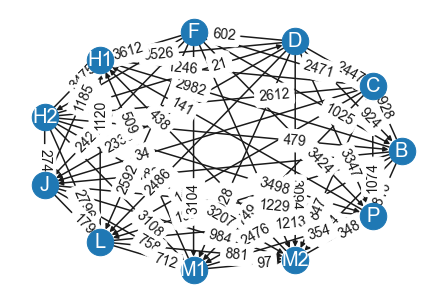

There is 1 cycle: 



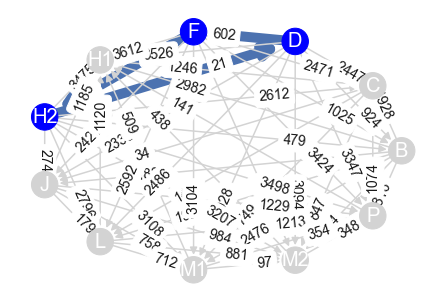

In [43]:
prof.display_margin_graph()

prof.margin_graph().display_cycles()


Smith Set winners are {D, F, H2}
Restrict to the Smith Set: 
H2(D F) 2521
F(D H2) 768
(D F H2) 1657
DFH2 1645
D(F H2) 681
FDH2 1051
H2DF 486
H2FD 381
DH2F 180
FH2D 190
There is 1 cycle: 



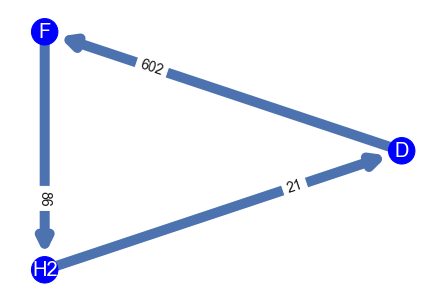

In [45]:
smith_set.display(prof)

print("Restrict to the Smith Set: ")
smith = smith_set(prof)

restricted_prof = prof.remove_candidates([c for c in prof.candidates if c not in smith])

restricted_prof.display_rankings()
restricted_prof.use_strict_preference()

restricted_prof.margin_graph().display_cycles()

In [46]:
cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
ranked_pairs.display(prof)



There is no Condorcet winner.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Ranked Pairs winner is {D}


## Example 3.1:   2009 Mayoral Election in Burlington, Vermont

In [35]:
short_candname = {
    "Bob Kiss": "P",
    "Andy Montroll": "D",
    "James Simpson": "G",
    "Dan Smith": "I",
    "Kurt Wright": "R",
    "Write-In": "W",
}

rc_winner = 'P'
# Use preflibtools to process the file.
instance = OrdinalInstance()
instance.parse_file("./preflib-data/00005-00000002.toi")

rankings = list()
rcounts = list()
for order in instance.orders:
    
    rank = dict()
    
    for r,cs in enumerate(order): 
        for c in cs: 
            rank[c] = r + 1
    rankings.append(rank)
    rcounts.append(instance.multiplicity[order])

cmap = dict()
for alt, alt_name in instance.alternatives_name.items():
    cmap[alt] = short_candname[alt_name]
    if alt_name == 'Bob Kiss': 
        rc_winner = alt
    
prof = ProfileWithTies(rankings, 
                       rcounts = rcounts, 
                       cmap=cmap,
                       candidates = list(cmap.keys()))

prof.report()
prof.display_rankings()

# Use the extended strict preference in which all ranked candidates are strictly preferred 
# to all unranked candidates 
prof.use_extended_strict_preference()



There are 6 candidates and 8980 rankings: 
        The number of empty rankings: 0
        The number of rankings with ties: 6
        The number of linear orders: 0
        The number of truncated linear orders: 8974
        The number of rankings with skipped ranks: 0
        
        
R 840
PD 355
P 326
RI 271
RD 256
PDI 234
DP 200
D 178
RDI 147
DPI 145
DI 139
PI 125
I 124
PDIRG 123
RID 122
PID 121
PDIGR 120
RDIGP 104
PDGIR 103
RDIPG 102
RIDPG 101
DR 94
DIP 93
IR 93
RIDGP 90
ID 90
IPD 88
IDP 83
PIDGR 80
RP 80
RIGDP 76
DPIRG 72
PDRIG 71
RDPIG 69
DIPRG 69
PR 66
DIR 62
DPIGR 61
DRIPG 60
PDIR 60
IPDGR 58
DRI 57
DRPIG 56
PIDRG 55
RDIP 54
DIPGR 53
IRDPG 52
RIPDG 52
DIRPG 52
PDG 52
IP 51
DPRIG 50
RPDIG 50
IRD 50
PDR 48
DPR 46
RDP 46
RPIDG 45
RIDP 45
IDPRG 43
PDIG 42
PDGI 41
DIPR 41
PRDIG 39
DRIGP 39
IDPGR 38
DPIR 38
DRIP 37
IDR 37
DRP 34
IPDRG 32
DIRP 32
IDRPG 31
PRD 31
RIP 30
PIDR 29
IRDGP 28
DPGIR 27
DIGPR 27
IRPDG 27
IPDR 27
IDRP 27
PIRDG 26
IDPR 26
RG 25
PGDIR 24
DPRI 24
PDRI 24
RPD 24

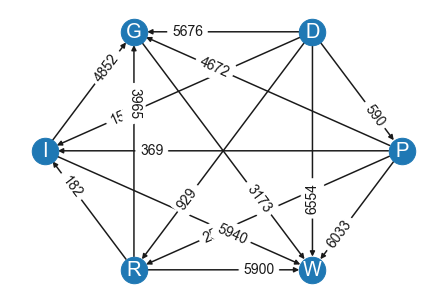

There are 0 cycles. 



In [36]:
prof.display_margin_graph()

prof.margin_graph().display_cycles()


In [37]:
cw = prof.condorcet_winner()

if cw is None: 
    print("There is no Condorcet winner.")
else: 
    print(f"The Condorcet winner is {cmap[cw]}.")

split_cycle_faster.display(prof)
stable_voting.display(prof)
minimax.display(prof)
beat_path_faster.display(prof)
copeland.display(prof)

print()

cl = prof.condorcet_loser()

if cl is None: 
    print("There is no Condorcet loser.")
else: 
    print(f"The Condorcet loser is {cmap[cl]}.")

The Condorcet winner is D.
Split Cycle winner is {D}
Stable Voting winner is {D}
Minimax winner is {D}
Beat Path winner is {D}
Copeland winner is {D}

The Condorcet loser is W.


In [38]:
print(f"The IRV winner is {cmap[rc_winner]}")
print(f"The margins of {cmap[rc_winner]} over each other candidate is: ")
for c in prof.candidates: 
    if c != rc_winner:
        print(f"\tThe margin of {cmap[rc_winner]} over {cmap[c]} is {prof.margin(rc_winner, c)}")

The IRV winner is P
The margins of P over each other candidate is: 
	The margin of P over D is -590
	The margin of P over G is 4672
	The margin of P over I is 369
	The margin of P over R is 250
	The margin of P over W is 6033
